In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
data=pd.read_csv('loan_sanction_train.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df=data.copy()

# EDA

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df['Gender'] = df['Gender'].fillna('Male')

In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df['Married'] = df['Married'].fillna('Yes')

In [13]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
df['Dependents'] = df['Dependents'].apply(lambda x:'3' if x=='3+' else x)

In [15]:
df["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [16]:
df['Dependents'] = df['Dependents'].fillna('0')

In [17]:
#change the data type
df['Dependents']=df['Dependents'].astype("int64")

In [18]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

In [20]:
df["LoanAmount"].median()

128.0

In [21]:
df['LoanAmount']=df['LoanAmount'].fillna(128.0)

In [22]:
df["Loan_Amount_Term"].median()

360.0

In [23]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360.0)

In [24]:
df["Credit_History"].median()

1.0

In [25]:
df['Credit_History']=df['Credit_History'].fillna(1.0)

In [26]:
for i in df.columns:
  print("*********************************************************",
        i , 
        "************************************************************")
  print()
  print(set(df[i].tolist()))
  print()

********************************************************* Loan_ID ************************************************************

{'LP002950', 'LP002768', 'LP001565', 'LP001404', 'LP001770', 'LP002031', 'LP002659', 'LP002524', 'LP002126', 'LP002403', 'LP001491', 'LP002757', 'LP001504', 'LP001715', 'LP001488', 'LP001883', 'LP002250', 'LP002547', 'LP001535', 'LP001806', 'LP002223', 'LP001356', 'LP001498', 'LP002224', 'LP001350', 'LP002530', 'LP002832', 'LP002560', 'LP001657', 'LP002234', 'LP002863', 'LP001343', 'LP001594', 'LP002582', 'LP001243', 'LP002622', 'LP001674', 'LP002229', 'LP002894', 'LP001029', 'LP001871', 'LP001003', 'LP001896', 'LP002272', 'LP001814', 'LP001671', 'LP001493', 'LP002377', 'LP002872', 'LP002051', 'LP002489', 'LP001137', 'LP001529', 'LP001940', 'LP001996', 'LP001790', 'LP002531', 'LP002281', 'LP002931', 'LP002734', 'LP002205', 'LP002720', 'LP001439', 'LP001333', 'LP002367', 'LP001765', 'LP001658', 'LP002418', 'LP002201', 'LP002054', 'LP002335', 'LP001574', 'LP0024

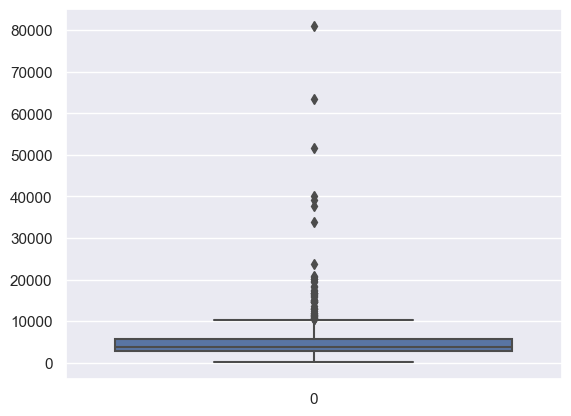

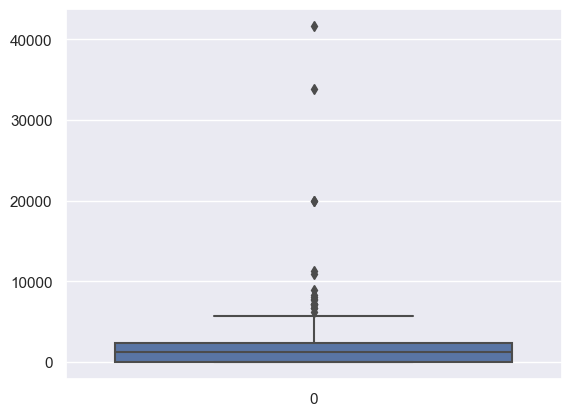

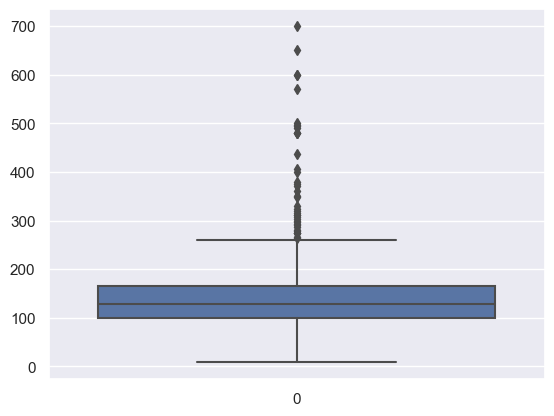

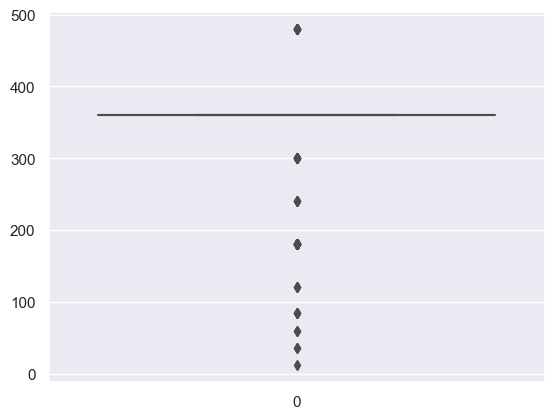

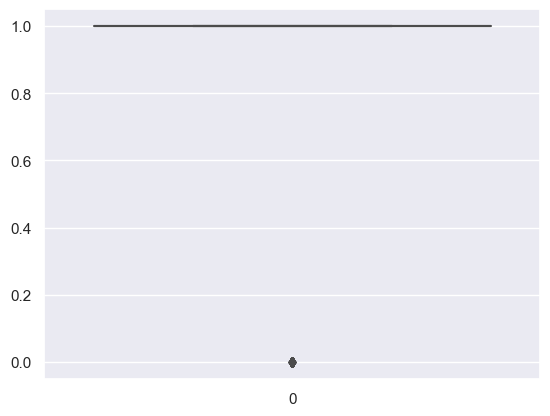

In [27]:
#Outlier handelling
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [29]:
lr_ai, up_ai = remove_outlier(df['ApplicantIncome'])

In [30]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > up_ai, up_ai,df['ApplicantIncome'])
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] < lr_ai, lr_ai,df['ApplicantIncome'])

In [31]:
lr_cai, up_cai = remove_outlier(df['CoapplicantIncome'])

In [32]:
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > up_cai, up_cai,df['CoapplicantIncome'])
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] < lr_cai, lr_cai,df['CoapplicantIncome'])

In [33]:
lr_la,up_la= remove_outlier(df['LoanAmount'])


In [34]:
df['LoanAmount'] = np.where(df['LoanAmount'] > up_la, up_la,df['LoanAmount'])
df['LoanAmount'] = np.where(df['LoanAmount'] < lr_la, lr_la,df['LoanAmount'])

<Axes: ylabel='LoanAmount'>

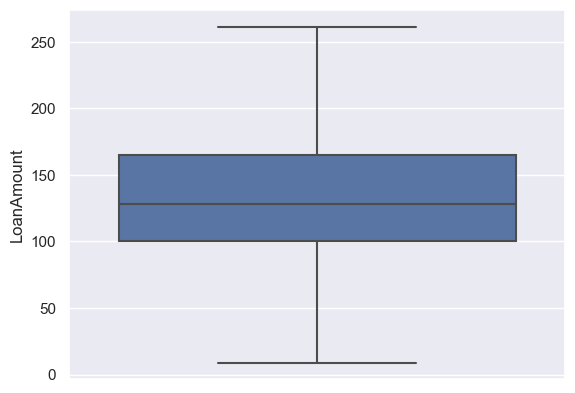

In [35]:
sns.boxplot(y="LoanAmount", data=df)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [37]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,4617.111564,1419.702231,137.365635,342.410423,0.855049
std,1.009623,2479.851729,1624.605892,55.779749,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,10171.250000,5743.125000,261.500000,480.000000,1.000000


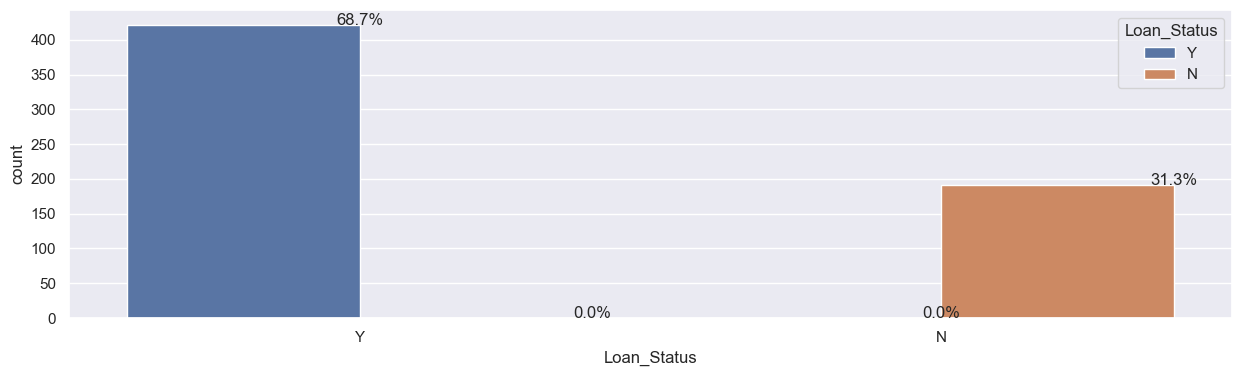

In [39]:
# Using map function to convert y/n as 1/0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


In [40]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [41]:
df['ApplicantIncome']=df['ApplicantIncome'].astype("int64")
df['CoapplicantIncome']=df['CoapplicantIncome'].astype("int64")
df['LoanAmount']=df['LoanAmount'].astype("int64")
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype("int64")
df['Credit_History']=df['Credit_History'].astype("int64")

<Axes: xlabel='Gender', ylabel='Count'>

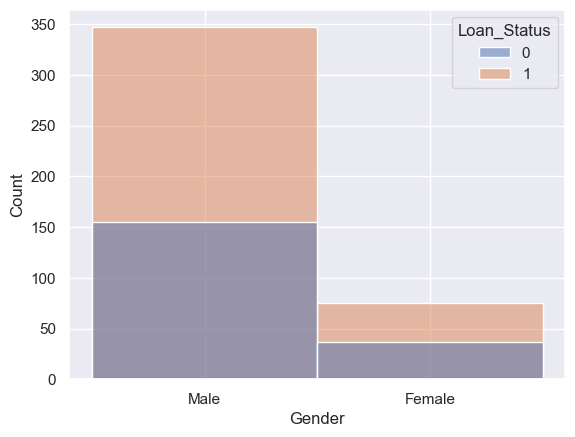

In [42]:
#realtionship of loan status with gender
sns.histplot(data=df, x="Gender",hue="Loan_Status")


<Axes: xlabel='LoanAmount', ylabel='Count'>

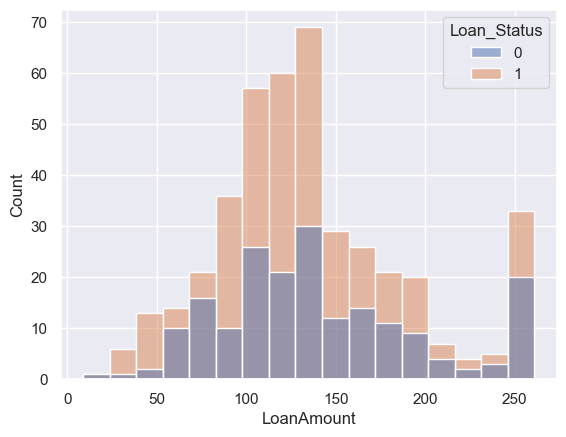

In [43]:
sns.histplot(data=df, x="LoanAmount", hue="Loan_Status")


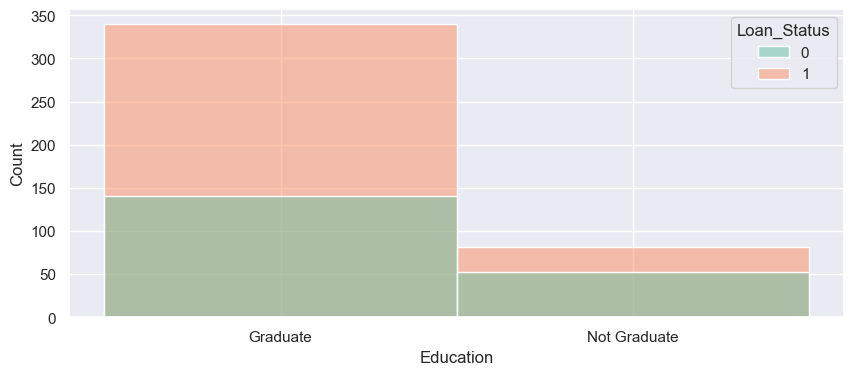

In [44]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x="Education",hue="Loan_Status",palette="Set2")
plt.show()

<Figure size 1000x400 with 0 Axes>

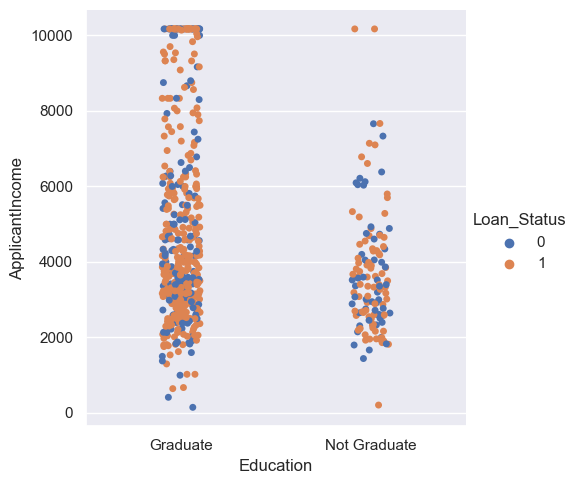

In [45]:
plt.figure(figsize=(10,4))
sns.catplot(data=df, x="Education", y="ApplicantIncome",hue="Loan_Status")
plt.show()


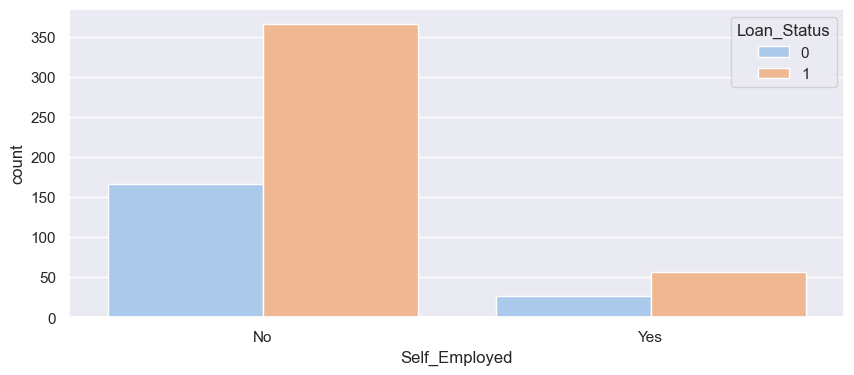

In [46]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="Self_Employed", hue="Loan_Status", palette="pastel")
plt.show()

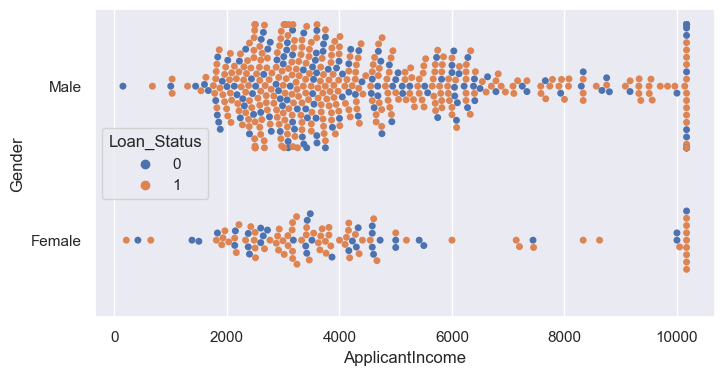

In [47]:
plt.figure(figsize=(8,4))
00plt.show()

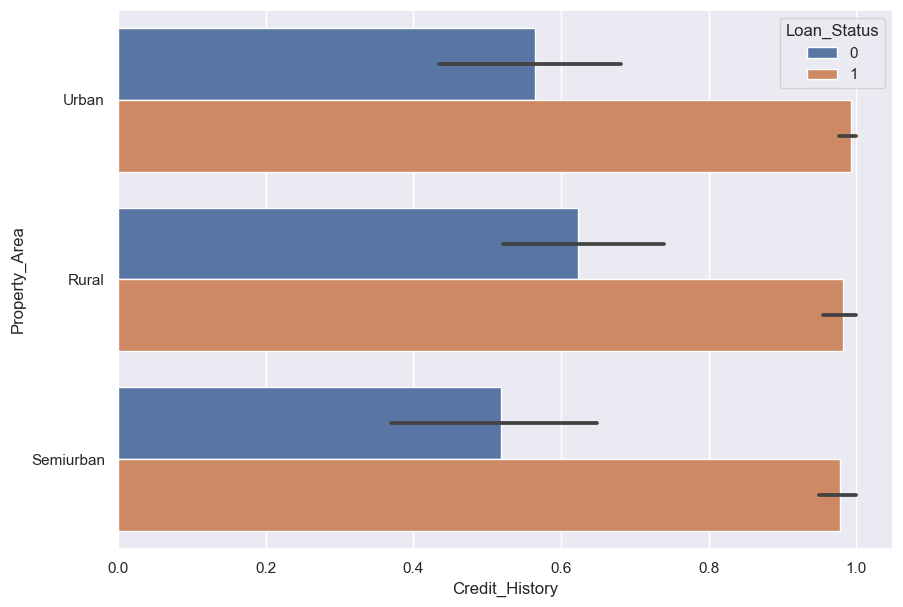

In [48]:
#Years at Company
plt.figure(figsize=(10,7))
sns.barplot(data=df, x="Credit_History", y="Property_Area", hue="Loan_Status")
plt.show()
plt.show()

In [49]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,1
610,LP002979,Male,Yes,3,Graduate,No,4106,0,40,180,1,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0,133,360,0,Semiurban,0


# Encoding

In [50]:
df = df.drop(['Loan_ID'], axis=1)

In [51]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [52]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0,128,360,1,Urban
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban


In [53]:
from sklearn import preprocessing
Gender = preprocessing.LabelEncoder()
x['Gender'] = Gender.fit_transform(x['Gender'])
Married = preprocessing.LabelEncoder()
x['Married'] = Married.fit_transform(x['Married'])
Education= preprocessing.LabelEncoder()
x['Education'] = Education.fit_transform(x['Education'])
Self_Employed= preprocessing.LabelEncoder()
x['Self_Employed'] = Self_Employed.fit_transform(x['Self_Employed'])
x = pd.get_dummies(x, columns=['Property_Area'],drop_first=True)

In [54]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0,128,360,1,0,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,0,1
3,1,1,0,1,0,2583,2358,120,360,1,0,1
4,1,0,0,0,0,6000,0,141,360,1,0,1


In [55]:
import imblearn

In [56]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [57]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x_over,y_over=over.fit_resample(x,y)

In [58]:
print(x_over.shape, y_over.shape)
print(x.shape, y.shape)

(844, 12) (844,)
(614, 12) (614,)


In [59]:
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Feature Scaling

In [60]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0,128,360,1,0,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,0,1
3,1,1,0,1,0,2583,2358,120,360,1,0,1
4,1,0,0,0,0,6000,0,141,360,1,0,1


In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x_over)

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_scaler,y_over, test_size=0.2, random_state=5)

In [63]:
# !pip install xgboost

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

              Method Used  Accuracy
0            DecisionTree  0.881657
1            RandomForest  0.899408
2  Support Vector Machine  0.804734
3     K Nearest Neighbors  0.727811
4     Naive Bayes Theorem  0.781065
5                 XGBoost  0.857988
6                  Voting  0.911243
Axes(0.125,0.11;0.775x0.77)


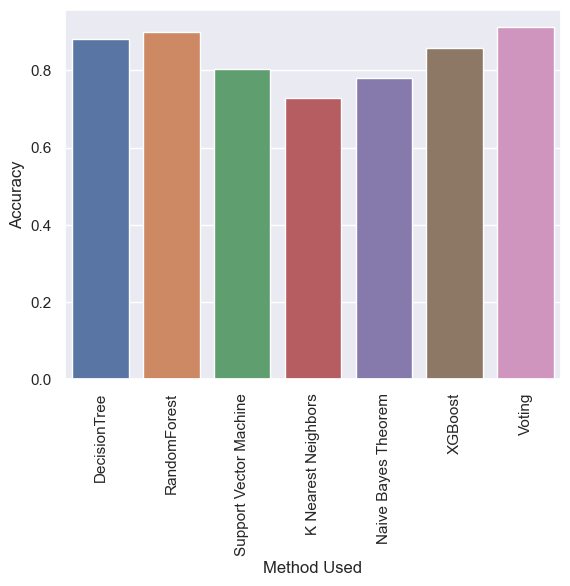

In [65]:
list_met = []
list_accuracy = []

# DecisionTree
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# SVC
svc = SVC()
svc = svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

#XGBoost Classifer
xgb = XGBClassifier()
xgb = xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Combining all the above model with voting classifier
model_evc = VotingClassifier(estimators=[ ('dt',dt),('rf', rf),('svc', svc),('knn', knn),('nb', nb),('XGB', xgb)], voting='hard')
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['DecisionTree','RandomForest','Support Vector Machine','K Nearest Neighbors','Naive Bayes Theorem','XGBoost','Voting']

list2 = [ accuracy_dt, accuracy_rf, accuracy_svc, accuracy_knn, accuracy_nb, accuracy_xgb, accuracy_evc]

list3 = [ dt, rf, svc, knn, nb,xgb, model_evc]

df_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})

print(df_accuracy)

chart = sns.barplot(x = 'Method Used', y='Accuracy', data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [66]:
#As random forest shows best result, we are going to use random forest model
#using hyper parameter tuning
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

In [67]:
np.random.seed(43)
param_dist = [{'n_estimators':[50,90,60,80,20],
               'max_depth': [12,16,17,14,15],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}]
gs = GridSearchCV(rf, param_grid=param_dist, cv=10,n_jobs = 5)
gs.fit(x_train, y_train)


print(f'The best parameters are : {gs.best_params_}')
              

The best parameters are : {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 80}


In [68]:
print("Detailed Classification Report :")
y_true, lr_pred = y_test, gs.predict(x_test)
print(classification_report(y_true, lr_pred))   
print("************************************")
print(accuracy_score(y_true, lr_pred))    

Detailed Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        79
           1       0.92      0.89      0.90        90

    accuracy                           0.90       169
   macro avg       0.90      0.90      0.90       169
weighted avg       0.90      0.90      0.90       169

************************************
0.8994082840236687


In [69]:
rf.set_params(criterion = 'entropy', 
              max_depth= 15,
              max_features='sqrt',
              n_estimators= 80)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=80)

In [70]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=80)

# Prediction

In [71]:
test= pd.read_csv('loan_sanction_test.csv')
test_set=test.copy()
test_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [72]:
x_train.shape, test_set.shape

((675, 12), (367, 12))

In [73]:
test_set.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [74]:
test_set.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [75]:
#imputation
test_set['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [76]:
test_set['Gender']=test_set['Gender'].fillna('Male')

In [77]:
test_set['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [78]:
test_set['Dependents']=test_set['Dependents'].apply(lambda x:3 if x=='3+' else x)

In [79]:
test_set['Dependents'].value_counts()

0    200
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [80]:
test_set['Dependents']=test_set['Dependents'].fillna('0')

In [81]:
#change the data type
test_set['Dependents']=test_set['Dependents'].astype('int64')

In [82]:
test_set['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [83]:
test_set['Self_Employed']=test_set['Self_Employed'].fillna('No')

In [84]:
test_set['LoanAmount'].median()

125.0

In [85]:
test_set['LoanAmount']=test_set['LoanAmount'].fillna(125.0)

In [86]:
test_set['Loan_Amount_Term'].median()

360.0

In [87]:
test_set['Loan_Amount_Term']=test_set['Loan_Amount_Term'].fillna(360.0)

In [88]:
test_set['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [89]:
test_set['Credit_History']=test_set['Credit_History'].fillna(1.0)

In [90]:
for i in test_set.columns:
  print("*********************************************************",
        i , 
        "************************************************************")
  print()
  print(set(test_set[i].tolist()))
  print()

********************************************************* Loan_ID ************************************************************

{'LP002735', 'LP002793', 'LP002257', 'LP001446', 'LP001183', 'LP001082', 'LP001351', 'LP002016', 'LP001176', 'LP001627', 'LP002123', 'LP002566', 'LP001785', 'LP002270', 'LP001563', 'LP001348', 'LP001099', 'LP002445', 'LP001210', 'LP002867', 'LP001548', 'LP001232', 'LP001128', 'LP001591', 'LP002310', 'LP002167', 'LP002400', 'LP002099', 'LP001923', 'LP002542', 'LP002402', 'LP001650', 'LP002389', 'LP002172', 'LP001499', 'LP001818', 'LP001124', 'LP002118', 'LP001622', 'LP001652', 'LP001486', 'LP001771', 'LP001312', 'LP002394', 'LP002354', 'LP002412', 'LP002746', 'LP001298', 'LP001242', 'LP001589', 'LP002986', 'LP002286', 'LP001739', 'LP002306', 'LP002954', 'LP002046', 'LP002605', 'LP002441', 'LP002007', 'LP002333', 'LP002581', 'LP002017', 'LP001728', 'LP002858', 'LP001445', 'LP002045', 'LP001321', 'LP001450', 'LP001471', 'LP002769', 'LP001822', 'LP002843', 'LP0027

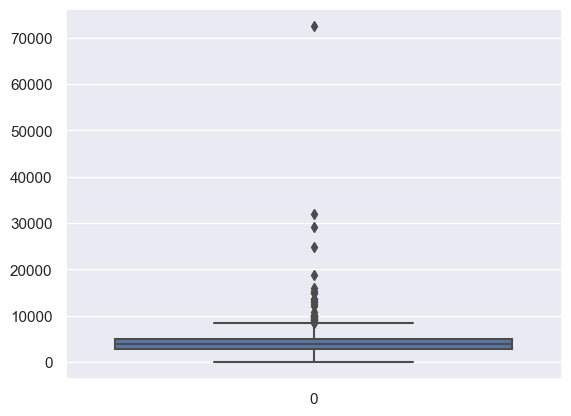

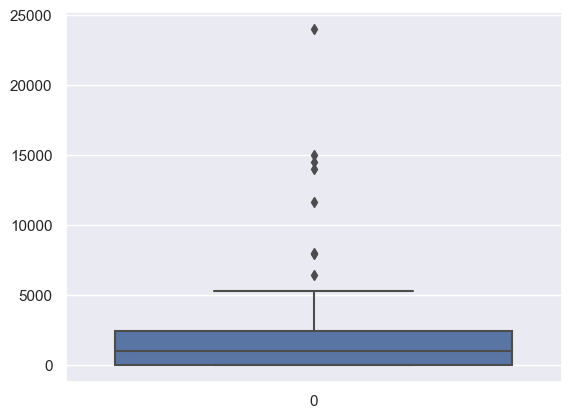

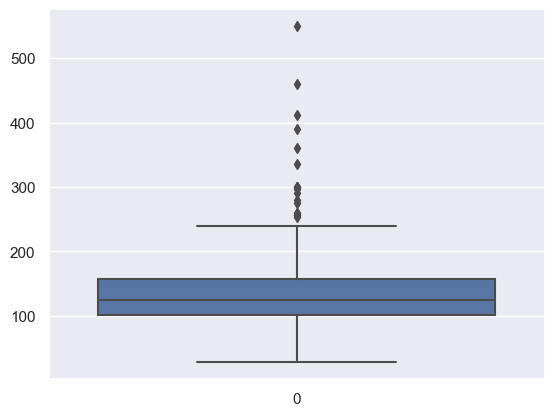

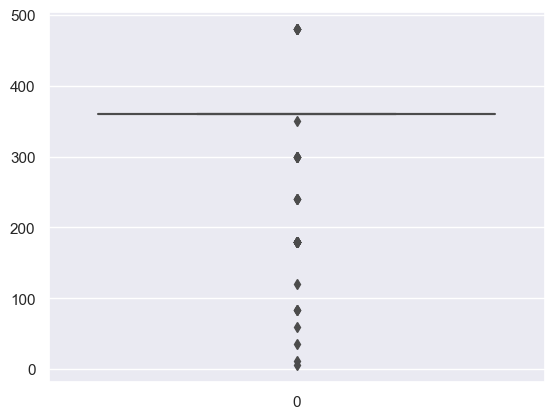

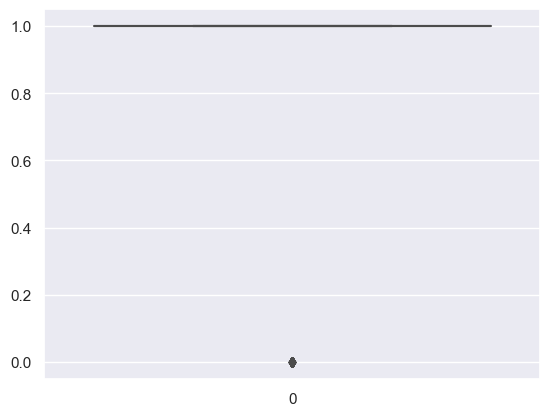

In [91]:
#Outlier handelling
def boxplots(col):
    sns.boxplot(test_set[col])
    plt.show()
    
for i in list(test_set.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

In [92]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [93]:
lr_ai, up_ai = remove_outlier(test_set['ApplicantIncome'])

In [94]:
test_set['ApplicantIncome'] = np.where(test_set['ApplicantIncome'] > up_ai, up_ai,test_set['ApplicantIncome'])
test_set['ApplicantIncome'] = np.where(test_set['ApplicantIncome'] < lr_ai, lr_ai,test_set['ApplicantIncome'])

In [95]:
lr_cai, up_cai = remove_outlier(test_set['CoapplicantIncome'])

In [96]:
test_set['CoapplicantIncome'] = np.where(test_set['CoapplicantIncome'] > up_cai, up_cai,test_set['CoapplicantIncome'])
test_set['CoapplicantIncome'] = np.where(test_set['CoapplicantIncome'] < lr_cai, lr_cai,test_set['CoapplicantIncome'])

In [97]:
lr_la,up_la= remove_outlier(test_set['LoanAmount'])

In [98]:
test_set['LoanAmount'] = np.where(test_set['LoanAmount'] > up_la, up_la,test_set['LoanAmount'])
test_set['LoanAmount'] = np.where(test_set['LoanAmount'] < lr_la, lr_la,test_set['LoanAmount'])

In [99]:
from sklearn import preprocessing
Gender = preprocessing.LabelEncoder()
test_set['Gender'] = Gender.fit_transform(test_set['Gender'])
Married = preprocessing.LabelEncoder()
test_set['Married'] = Married.fit_transform(test_set['Married'])
Education= preprocessing.LabelEncoder()
test_set['Education'] = Education.fit_transform(test_set['Education'])
Self_Employed= preprocessing.LabelEncoder()
test_set['Self_Employed'] = Self_Employed.fit_transform(test_set['Self_Employed'])
test_set = pd.get_dummies(test_set, columns=['Property_Area'],drop_first=True)

In [100]:
test_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,1,1,0,0,0,5720.0,0.0,110.0,360.0,1.0,0,1
1,LP001022,1,1,1,0,0,3076.0,1500.0,126.0,360.0,1.0,0,1
2,LP001031,1,1,2,0,0,5000.0,1800.0,208.0,360.0,1.0,0,1
3,LP001035,1,1,2,0,0,2340.0,2546.0,100.0,360.0,1.0,0,1
4,LP001051,1,0,0,1,0,3276.0,0.0,78.0,360.0,1.0,0,1


In [101]:
test_set = test_set.drop(['Loan_ID'], axis=1)

In [102]:
pred= rf.predict(test_set)

In [103]:
test_set['Prediction'] = pred
test_set.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Prediction
0,1,1,0,0,0,5720.0,0.0,110.0,360.0,1.0,0,1,1
1,1,1,1,0,0,3076.0,1500.0,126.0,360.0,1.0,0,1,1
2,1,1,2,0,0,5000.0,1800.0,208.0,360.0,1.0,0,1,1
3,1,1,2,0,0,2340.0,2546.0,100.0,360.0,1.0,0,1,1
4,1,0,0,1,0,3276.0,0.0,78.0,360.0,1.0,0,1,0


In [104]:
test_set['Prediction'].value_counts()

1    206
0    161
Name: Prediction, dtype: int64